# Ejercicio preprocesamiento

En este ejercicio vamos a trabajar con el dataset que se encuentra en el fichero Building_Permits.csv. Obviamente lo primero que debemos hacer es leer el fichero

In [25]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer


In [26]:
df = pd.read_csv('../data/Building_Permits.csv',sep=',')
df.head()

C:\Users\rotan\AppData\Local\Temp\ipykernel_17820\1972992334.py:1: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/Building_Permits.csv',sep=',')


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


Compruebe de qué clase es cada variable 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

Imprima los principales estadísticos de las variables numéricas

In [4]:
df.describe()

,Permit Type,Street Number,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode,Record ID
count,198900.000000,198900.000000,29479.000000,156116.000000,156032.000000,1.608340e+05,1.928340e+05,147362.000000,147989.000000,161591.000000,155534.000000,155738.000000,197183.000000,197184.000000,1.989000e+05
mean,7.522323,1121.728944,78.517182,5.705773,5.745043,1.689554e+05,1.328562e+05,15.666164,16.510950,1.274650,4.072878,4.089529,5.538403,94115.500558,1.162048e+12
std,1.457451,1135.768948,326.981324,8.613455,8.613284,3.630386e+06,3.584903e+06,74.476321,75.220444,22.407345,1.585756,1.578766,2.887041,9.270131,4.918215e+11
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,94102.000000,1.293532e+10
25%,8.000000,235.000000,0.000000,2.000000,2.000000,3.300000e+03,1.000000e+00,1.000000,1.000000,0.000000,3.000000,3.000000,3.000000,94109.000000,1.308567e+12
50%,8.000000,710.000000,0.000000,3.000000,3.000000,1.100000e+04,7.000000e+03,1.000000,2.000000,2.000000,5.000000,5.000000,6.000000,94114.000000,1.371840e+12
75%,8.000000,1700.000000,1.000000,4.000000,4.000000,3.500000e+04,2.870750e+04,4.000000,4.000000,2.000000,5.000000,5.000000,8.000000,94122.000000,1.435000e+12
max,8.000000,8400.000000,6004.000000,78.000000,78.000000,5.379586e+08,7.805000e+08,1907.000000,1911.000000,9000.000000,5.000000,5.000000,11.000000,94158.000000,1.498342e+12


¿Cuántos valores nulos tenemos de la variable 'Plansets'?

In [5]:
df.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

¿Cuántos valores faltantes tiene la fila con el máximo número de ellos? 

In [6]:
df[df.isnull().sum(axis=1) == df.isnull().sum(axis=1).max()]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
116703,201603071336,8,otc alterations permit,03/07/2016,0000,000,250,NaN,13th,St,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1415045504136


## Tratamiento de los valores perdidos


Vamos a establecer una semilla como 1234 (fundamental para la reproducibilidad) obtener un subconjunto aleatorio de 10000 del conjunto de datos original y seleccionar las columnas

- Number of Existing Stories              
- Number of Proposed Stories 
- Estimated Cost
- Revised Cost 
- Plansets

In [7]:
cols=['Number of Existing Stories','Number of Proposed Stories','Estimated Cost','Revised Cost','Plansets']
df_sample=df[cols].copy().sample(n=10000,random_state=1234)

Haga una copia de este dataframe y elimine todas las filas con al menos un valor faltante. Analice cómo cambian las estadísticas de los atributos.

In [8]:
df_sample_2 = df_sample.copy().dropna(axis=0)
df_sample_2.describe()

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets
count,7444.000000,7444.000000,7.444000e+03,7.444000e+03,7444.000000
mean,5.727834,5.759001,7.403449e+04,8.417730e+04,1.170607
std,8.517557,8.540140,4.069266e+05,4.117841e+05,0.988264
min,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000
25%,2.000000,2.000000,3.500000e+03,3.000000e+03,0.000000
50%,3.000000,3.000000,1.150000e+04,1.200000e+04,2.000000
75%,4.000000,4.000000,3.500000e+04,4.000000e+04,2.000000
max,63.000000,63.000000,1.850000e+07,1.900000e+07,3.000000


### Mean/Median/Mode Imputing

Haga una copia del dataframe auxiliar y realice una imputación usando medias medias/medianas/modas. Analice cómo cambian las estadísticas de los atributos.

In [9]:
df_mean_imp=df_sample.copy()
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df_mean_imp.iloc[:,1:3])
df_mean_imp.iloc[:,1:3] = imr.transform(df_mean_imp.iloc[:,1:3])
df_mean_imp.iloc[:,0:3]

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost
61449,NaN,5.678035,134378.150058
75024,3.0,3.000000,1.000000
23122,3.0,3.000000,1.000000
110307,NaN,3.000000,800000.000000
4861,25.0,25.000000,20000.000000
...,...,...,...
103333,1.0,1.000000,3500.000000
10050,12.0,12.000000,112000.000000
56325,7.0,7.000000,12000.000000
1871,NaN,5.678035,134378.150058


In [10]:
df_mean_imp_v2=df_sample.copy()
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(df_mean_imp_v2.iloc[:,1:2])
df_mean_imp_v2.iloc[:,1:2] = imr.transform(df_mean_imp_v2.iloc[:,1:2])
df_mean_imp_v2

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets
61449,NaN,3.0,NaN,1.0,NaN
75024,3.0,3.0,1.0,1.0,2.0
23122,3.0,3.0,1.0,1.0,0.0
110307,NaN,3.0,800000.0,NaN,2.0
4861,25.0,25.0,20000.0,20000.0,2.0
...,...,...,...,...,...
103333,1.0,1.0,3500.0,3500.0,2.0
10050,12.0,12.0,112000.0,112000.0,2.0
56325,7.0,7.0,12000.0,12000.0,0.0
1871,NaN,3.0,NaN,1.0,NaN


In [11]:
df_mean_imp_v3=df_sample.copy()
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(pd.DataFrame(df_mean_imp_v3.iloc[:,1]))
df_mean_imp_v3.iloc[:,1] = imr.transform(pd.DataFrame(df_mean_imp_v3.iloc[:,1]))
df_mean_imp_v3

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets
61449,NaN,2.0,NaN,1.0,NaN
75024,3.0,3.0,1.0,1.0,2.0
23122,3.0,3.0,1.0,1.0,0.0
110307,NaN,3.0,800000.0,NaN,2.0
4861,25.0,25.0,20000.0,20000.0,2.0
...,...,...,...,...,...
103333,1.0,1.0,3500.0,3500.0,2.0
10050,12.0,12.0,112000.0,112000.0,2.0
56325,7.0,7.0,12000.0,12000.0,0.0
1871,NaN,2.0,NaN,1.0,NaN


In [12]:
df_sample.describe()

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets
count,7842.000000,7858.000000,8.100000e+03,9.678000e+03,8132.000000
mean,5.670620,5.678035,1.343782e+05,1.070871e+05,1.225037
std,8.430956,8.391279,1.849473e+06,2.090192e+06,0.977057
min,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000
25%,2.000000,2.000000,3.500000e+03,1.000000e+00,0.000000
50%,3.000000,3.000000,1.160000e+04,7.000000e+03,2.000000
75%,4.000000,4.000000,3.852500e+04,2.850000e+04,2.000000
max,63.000000,63.000000,1.142720e+08,1.439825e+08,3.000000


In [13]:
df_mean_imp_v4=df_sample.copy()
imr = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=25)
imr = imr.fit(pd.DataFrame(df_mean_imp_v4.iloc[:,1]))
df_mean_imp_v4.iloc[:,1] = imr.transform(pd.DataFrame(df_mean_imp_v4.iloc[:,1]))
df_mean_imp_v4

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets
61449,NaN,25.0,NaN,1.0,NaN
75024,3.0,3.0,1.0,1.0,2.0
23122,3.0,3.0,1.0,1.0,0.0
110307,NaN,3.0,800000.0,NaN,2.0
4861,25.0,25.0,20000.0,20000.0,2.0
...,...,...,...,...,...
103333,1.0,1.0,3500.0,3500.0,2.0
10050,12.0,12.0,112000.0,112000.0,2.0
56325,7.0,7.0,12000.0,12000.0,0.0
1871,NaN,25.0,NaN,1.0,NaN


### K-Nearest Neighbors Imputing
Haga una copia del conjunto de datos auxiliar y rellene los huecos mediante un enfoque de k vecinos más próximos utilizando 5 vecinos y una función de pesos uniforme.

In [14]:
from sklearn.impute import KNNImputer
df_sample_imp=df_sample.copy()
imr = KNNImputer(n_neighbors=5, weights="uniform")
df_sample_imp.iloc[:,1:2]=imr.fit_transform(df_sample_imp.iloc[:,1:2])
df_sample_imp

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets
61449,NaN,5.678035,NaN,1.0,NaN
75024,3.0,3.000000,1.0,1.0,2.0
23122,3.0,3.000000,1.0,1.0,0.0
110307,NaN,3.000000,800000.0,NaN,2.0
4861,25.0,25.000000,20000.0,20000.0,2.0
...,...,...,...,...,...
103333,1.0,1.000000,3500.0,3500.0,2.0
10050,12.0,12.000000,112000.0,112000.0,2.0
56325,7.0,7.000000,12000.0,12000.0,0.0
1871,NaN,5.678035,NaN,1.0,NaN


Haga lo mismo pero considerando únicamente 4 vecinos y ajustando el peso que se le da a cada vecino en función de la distancia.

In [15]:
imr = KNNImputer(n_neighbors=4, weights="distance")
df_sample_imp.iloc[:,:]=imr.fit_transform(df_sample_imp.iloc[:,:])
df_sample_imp

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets
61449,8.0,5.678035,3400.5,1.0,2.0
75024,3.0,3.000000,1.0,1.0,2.0
23122,3.0,3.000000,1.0,1.0,0.0
110307,3.0,3.000000,800000.0,585000.0,2.0
4861,25.0,25.000000,20000.0,20000.0,2.0
...,...,...,...,...,...
103333,1.0,1.000000,3500.0,3500.0,2.0
10050,12.0,12.000000,112000.0,112000.0,2.0
56325,7.0,7.000000,12000.0,12000.0,0.0
1871,8.0,5.678035,3400.5,1.0,2.0


### Iterative imputer

Finalmente aplique un IterativeImputer con una semilla de 0 y 10 iteraciones

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df_sample_imp=df_sample.copy()
imr = IterativeImputer(max_iter=10, random_state=0)
imr.fit(df_mean_imp.iloc[:,:])
df_sample_imp.iloc[:,:]= np.round(imr.transform(df_sample_imp.iloc[:,:]))

df_sample_imp

,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets
61449,6.0,6.0,37710.0,1.0,1.0
75024,3.0,3.0,1.0,1.0,2.0
23122,3.0,3.0,1.0,1.0,0.0
110307,3.0,3.0,800000.0,1053118.0,2.0
4861,25.0,25.0,20000.0,20000.0,2.0
...,...,...,...,...,...
103333,1.0,1.0,3500.0,3500.0,2.0
10050,12.0,12.0,112000.0,112000.0,2.0
56325,7.0,7.0,12000.0,12000.0,0.0
1871,6.0,6.0,37710.0,1.0,1.0


## Escalando Variables 
Vamos a crear 3 variables adicionales del atributo "Estimated Cost". La primera será una versión escalada 0-1 del atributo original, la segunda será una versión escalada de la original con media 0 y desviación típica unitaria y la tercera consistirá en la transformación logarítmica de la variable original. Analice la distribución de los datos de las diferentes transformaciones.

<Axes: >

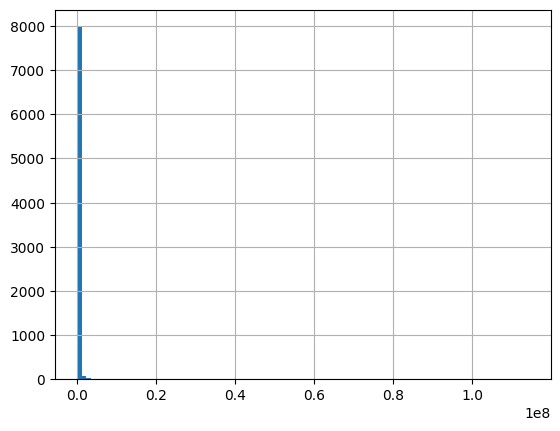

In [17]:
df_scaling=df_sample.copy()
df_scaling[ 'Estimated Cost' ].hist(bins=100)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
mmax = MinMaxScaler()
atribute = 'Estimated Cost'
df_scaling_mm = mmax.fit_transform(df_scaling[[atribute]])
sts = StandardScaler()
df_scaling_sts = sts.fit_transform(df_scaling[[atribute]])
df_scaling['Estimated Cost_mmax']= df_scaling_mm
df_scaling['Estimated Cost_sts'] = df_scaling_sts
df_scaling['Estimated Cost_log'] = np.log(1+df_scaling[atribute])
df_scaling.describe()



,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Plansets,Estimated Cost_mmax,Estimated Cost_sts,Estimated Cost_log
count,7842.000000,7858.000000,8.100000e+03,9.678000e+03,8132.000000,8100.000000,8.100000e+03,8100.000000
mean,5.670620,5.678035,1.343782e+05,1.070871e+05,1.225037,0.001176,-8.333526e-18,8.740049
std,8.430956,8.391279,1.849473e+06,2.090192e+06,0.977057,0.016185,1.000062e+00,3.204885
min,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,-7.266148e-02,0.693147
25%,2.000000,2.000000,3.500000e+03,1.000000e+00,0.000000,0.000031,-7.076948e-02,8.160804
50%,3.000000,3.000000,1.160000e+04,7.000000e+03,2.000000,0.000102,-6.638958e-02,9.358847
75%,4.000000,4.000000,3.852500e+04,2.850000e+04,2.000000,0.000337,-5.183048e-02,10.559088
max,63.000000,63.000000,1.142720e+08,1.439825e+08,3.000000,1.000000,6.171740e+01,18.554092


<Axes: >

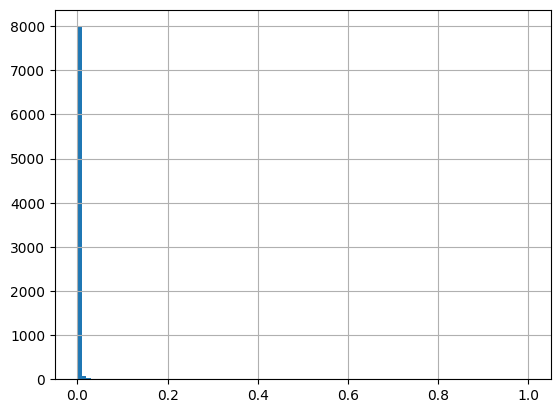

In [19]:
df_scaling['Estimated Cost_mmax'].hist(bins=100)

<Axes: >

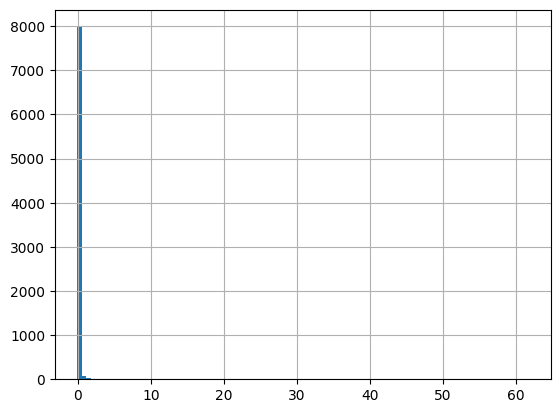

In [20]:
df_scaling['Estimated Cost_sts'].hist(bins=100)

<Axes: >

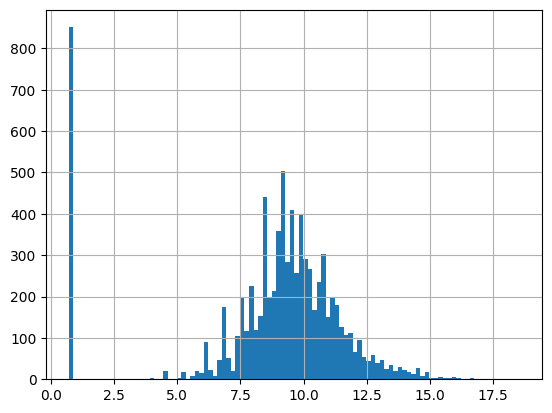

In [21]:
df_scaling['Estimated Cost_log'].hist(bins=100)

# Codificación
## Imputar valores a una variable ordinal

Vamos a establecer una semilla como 1234 (fundamental para la reproducibilidad) obtener un subconjunto aleatorio de 10000 del conjunto de datos original y seleccionar las columnas

- Estimated Cost
- Existing Construction Type Description
- Current Status


En este conjunto de datos, elimine las filas con vacíos

In [22]:
cols=['Estimated Cost','Existing Construction Type Description','Current Status']
df_imputing=df[cols].sample(n=10000,random_state=1234).dropna(axis=0)


Una de las variables categóricas "Existing Construction Type Description" es una variable ordinal, ya que tiene los siguientes valores

- 'constr type 1'
- 'constr type 2'
- 'constr type 3' 
- 'constr type 4
- 'wood frame (5)'

Cree un mapeo entre el valor referido y su número asociado (codificando 'constr type 1' como 1, 'constr type 2' como 2 y así sucesivamente) y cree una nueva columna numérica llamada 'Numerical type' usando el mapeo creado.

In [23]:
size_mapping = {'constr type': 1,
 'constr type':  2,
 'constr type': 3,
 'constr type': 4,
 'wood frame' : (5)}
df_imputing['Numerical type'] = df_imputing['Existing Construction Type Description'].map(size_mapping)
df_imputing

,Estimated Cost,Existing Construction Type Description,Current Status,Numerical type
75024,1.0,wood frame (5),issued,NaN
23122,1.0,wood frame (5),complete,NaN
4861,20000.0,constr type 1,complete,NaN
31756,12000.0,wood frame (5),complete,NaN
122291,7000.0,wood frame (5),complete,NaN
...,...,...,...,...
38101,10500.0,constr type 1,complete,NaN
103333,3500.0,wood frame (5),complete,NaN
10050,112000.0,constr type 1,complete,NaN
56325,12000.0,constr type 2,filed,NaN


### One-hot encoding

Defina una estrategia one hot encoding para la variable 'Current Status' eliminando la categoría base.

In [24]:
df_ohe=pd.get_dummies(df_imputing[['Current Status']],drop_first=True)
df_ohe

,Current Status_cancelled,Current Status_complete,Current Status_expired,Current Status_filed,Current Status_issued,Current Status_reinstated,Current Status_revoked,Current Status_suspend,Current Status_withdrawn
75024,False,False,False,False,True,False,False,False,False
23122,False,True,False,False,False,False,False,False,False
4861,False,True,False,False,False,False,False,False,False
31756,False,True,False,False,False,False,False,False,False
122291,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
38101,False,True,False,False,False,False,False,False,False
103333,False,True,False,False,False,False,False,False,False
10050,False,True,False,False,False,False,False,False,False
56325,False,False,False,True,False,False,False,False,False
